ADF Statistic: -2.307285179064527
p-value: 0.16962912078943665
Chuỗi thời gian không dừng, cần thực hiện biến đổi (Differencing)
ADF Statistic after differencing: -14.691774924143187
p-value after differencing: 3.0415339027295124e-27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  160
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -212.434
Date:                Mon, 06 Jan 2025   AIC                            434.869
Time:                        09:08:04   BIC                            450.213
Sample:                    01-01-2020   HQIC                           441.100
                         - 06-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7455      0.166    -10.488      0.000      -2.072      -1.419
ar.L2         -0.8494      0.148     -5.740      0.000      -1.139      -0.559
ma.L1          1.7386      0.203      8.556      0.0

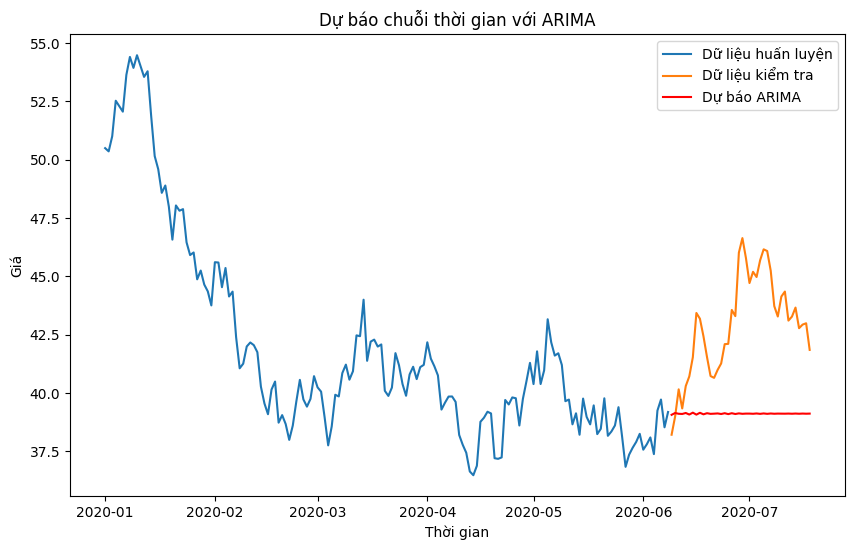

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  160
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -211.947
Date:                            Mon, 06 Jan 2025   AIC                            433.894
Time:                                    09:08:06   BIC                            448.846
Sample:                                01-01-2020   HQIC                           439.969
                                     - 06-08-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2650      0.698      0.380      0.704      -1.102       1.632
ma.L1         -0.3763      0.661   

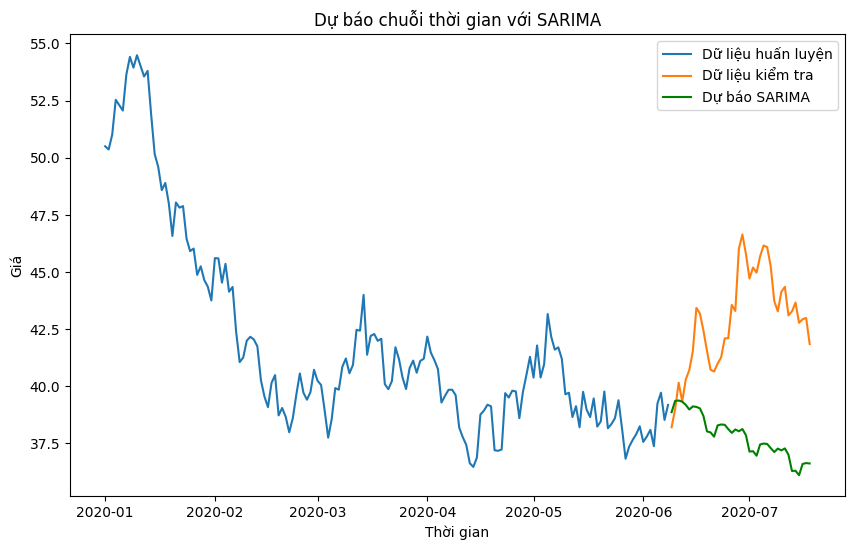

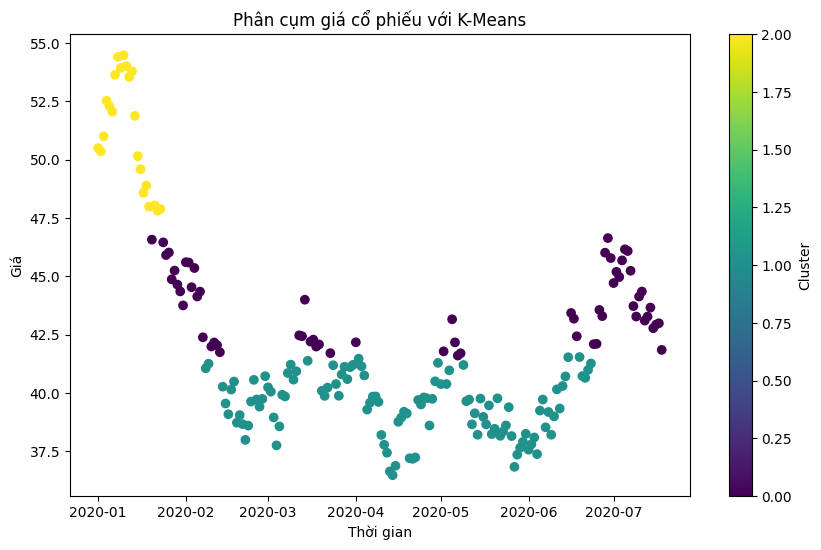

In [41]:
## Dự báo giá cổ phiếu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from sklearn.cluster import KMeans

# 1. Tạo dữ liệu chuỗi thời gian mẫu (giá cổ phiếu giả lập)
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=200, freq="D")
data = 50 + np.cumsum(np.random.normal(0, 1, 200))  # Giá cổ phiếu giả lập
ts_data = pd.DataFrame({"Date": dates, "Price": data})
ts_data.set_index("Date", inplace=True)

# 2. Kiểm tra tính dừng của chuỗi thời gian (ADF test)
result = adfuller(ts_data['Price'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Nếu p-value > 0.05, thực hiện differencing
if result[1] > 0.05:
    print("Chuỗi thời gian không dừng, cần thực hiện biến đổi (Differencing)")
    ts_data_diff = ts_data.diff().dropna()

    # Kiểm tra lại tính dừng sau khi differencing
    result = adfuller(ts_data_diff['Price'])
    print(f"ADF Statistic after differencing: {result[0]}")
    print(f"p-value after differencing: {result[1]}")

# 3. Chỉ định tần suất rõ ràng cho dữ liệu chuỗi thời gian
ts_data = ts_data.asfreq('D')

# 4. Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# 5. Xây dựng và huấn luyện mô hình ARIMA (ví dụ ARIMA(2, 1, 2))
model = ARIMA(train, order=(2, 1, 2))  # ARIMA(2, 1, 2)
model_fit = model.fit()
print(model_fit.summary())

# 6. Dự báo trên tập kiểm tra
forecast = model_fit.forecast(steps=len(test))

# 7. Đánh giá kết quả dự báo ARIMA
mse_arima = mean_squared_error(test, forecast)
print(f"ARIMA Mean Squared Error: {mse_arima:.2f}")

# 8. Hiển thị kết quả dự báo ARIMA
plt.figure(figsize=(10, 6))
plt.plot(train, label="Dữ liệu huấn luyện")
plt.plot(test, label="Dữ liệu kiểm tra")
plt.plot(test.index, forecast, label="Dự báo ARIMA", color="red")
plt.title("Dự báo chuỗi thời gian với ARIMA")
plt.xlabel("Thời gian")
plt.ylabel("Giá")
plt.legend()
plt.show()

# 9. Xây dựng mô hình SARIMA (ví dụ SARIMAX(1, 1, 1) x (1, 1, 1, 12))
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)
print(sarima_model_fit.summary())

# 10. Dự báo trên mô hình SARIMA
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

# 11. Đánh giá mô hình SARIMA
mse_sarima = mean_squared_error(test, sarima_forecast)
print(f"SARIMA Mean Squared Error: {mse_sarima:.2f}")

# 12. Hiển thị kết quả dự báo của SARIMA
plt.figure(figsize=(10, 6))
plt.plot(train, label="Dữ liệu huấn luyện")
plt.plot(test, label="Dữ liệu kiểm tra")
plt.plot(test.index, sarima_forecast, label="Dự báo SARIMA", color="green")
plt.title("Dự báo chuỗi thời gian với SARIMA")
plt.xlabel("Thời gian")
plt.ylabel("Giá")
plt.legend()
plt.show()

# 13. Phân cụm dữ liệu chuỗi thời gian bằng K-Means
X = ts_data[['Price']].values  # Chọn cột Price làm đầu vào cho K-Means
kmeans = KMeans(n_clusters=3)  # Số cụm là 3, có thể điều chỉnh
kmeans.fit(X)
ts_data['Cluster'] = kmeans.labels_

# 14. Hiển thị kết quả phân cụm
plt.figure(figsize=(10, 6))
plt.scatter(ts_data.index, ts_data['Price'], c=ts_data['Cluster'], cmap='viridis')
plt.title("Phân cụm giá cổ phiếu với K-Means")
plt.xlabel("Thời gian")
plt.ylabel("Giá")
plt.colorbar(label='Cluster')
plt.show()


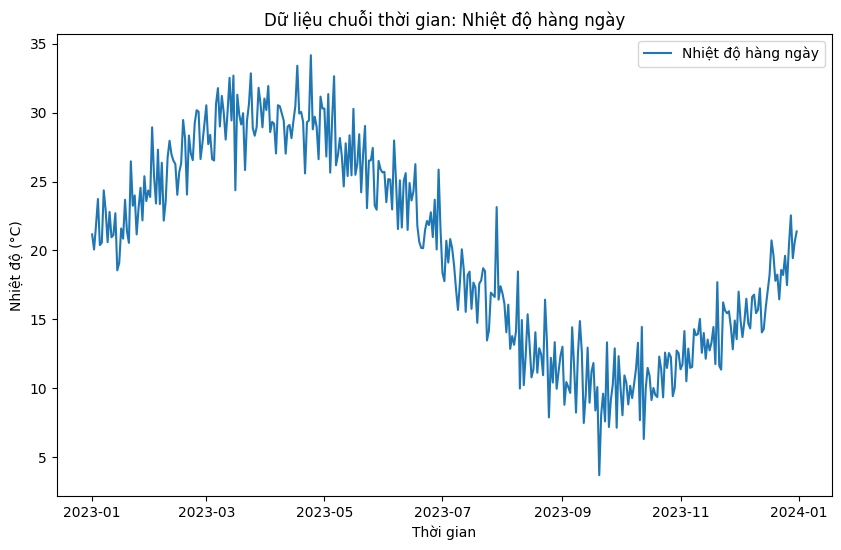

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                  292
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -635.123
Date:                Mon, 06 Jan 2025   AIC                           1282.247
Time:                        09:11:38   BIC                           1304.287
Sample:                    01-01-2023   HQIC                          1291.076
                         - 10-19-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8843      0.065    -13.566      0.000      -1.012      -0.757
ar.L2         -0.7087      0.082     -8.684      0.000      -0.869      -0.549
ar.L3         -0.5125      0.093     -5.525      0.0

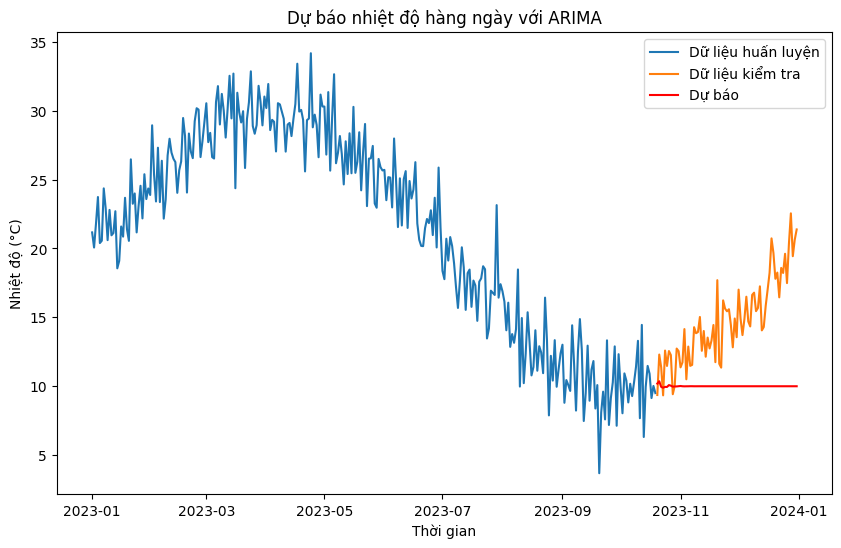

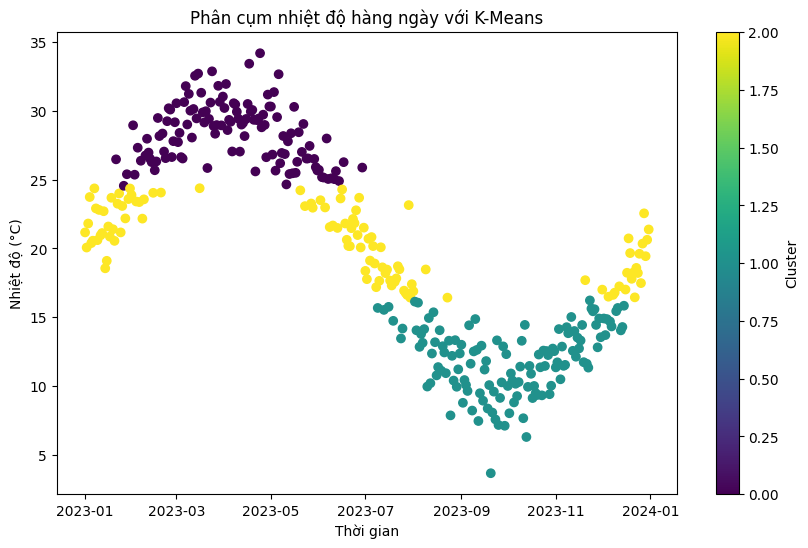

In [42]:
## Dự báo xu hướng thời tiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# 1. Tạo dữ liệu chuỗi thời gian giả lập (nhiệt độ hàng ngày)
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=365, freq="D")
data = 20 + 10 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 2, 365)
ts_data = pd.DataFrame({"Date": dates, "Temperature": data})
ts_data.set_index("Date", inplace=True)

# 2. Hiển thị dữ liệu chuỗi thời gian
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label="Nhiệt độ hàng ngày")
plt.title("Dữ liệu chuỗi thời gian: Nhiệt độ hàng ngày")
plt.xlabel("Thời gian")
plt.ylabel("Nhiệt độ (°C)")
plt.legend()
plt.show()

# 3. Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# 4. Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) = (5, 1, 0)
model_fit = model.fit()
print(model_fit.summary())

# 5. Dự báo trên tập kiểm tra
forecast = model_fit.forecast(steps=len(test))

# 6. Đánh giá kết quả dự báo
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")

# 7. Hiển thị kết quả dự báo
plt.figure(figsize=(10, 6))
plt.plot(train, label="Dữ liệu huấn luyện")
plt.plot(test, label="Dữ liệu kiểm tra")
plt.plot(test.index, forecast, label="Dự báo", color="red")
plt.title("Dự báo nhiệt độ hàng ngày với ARIMA")
plt.xlabel("Thời gian")
plt.ylabel("Nhiệt độ (°C)")
plt.legend()
plt.show()

# 8. Phân cụm dữ liệu chuỗi thời gian bằng K-Means
X = ts_data[['Temperature']].values  # Dữ liệu nhiệt độ
kmeans = KMeans(n_clusters=3)  # Phân thành 3 cụm
kmeans.fit(X)
ts_data['Cluster'] = kmeans.labels_

# 9. Hiển thị kết quả phân cụm
plt.figure(figsize=(10, 6))
plt.scatter(ts_data.index, ts_data['Temperature'], c=ts_data['Cluster'], cmap='viridis')
plt.title("Phân cụm nhiệt độ hàng ngày với K-Means")
plt.xlabel("Thời gian")
plt.ylabel("Nhiệt độ (°C)")
plt.colorbar(label='Cluster')
plt.show()
